# SciPy Studying

## 说明

该文档是对[Scipy官网](https://scipy.org/)的学习笔记。主要由以下两部分构成：

- [Getting Started](https://scipy.org/getting-started.html)
- [SciPy Tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html)

## **Getting Started**

这篇文档主要是对Scipy的一些简单介绍。

SciPy以及同系列的库可以用来实现各种各样的任务：

同时在这里也给出了一些参考资料：
- [Python Scientific Lecture Notes](http://scipy-lectures.org/index.html)
- [NumPy User Guide](http://docs.scipy.org/doc/numpy-dev/user/)
- [SciPy Tutorial](http://docs.scipy.org/doc/scipy/reference/tutorial/index.html)
- [Matplotlib beginner’s guide](http://matplotlib.org/users/beginner.html)
- [Pandas tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)
- [Sympy tutorial](http://docs.sympy.org/latest/tutorial/)

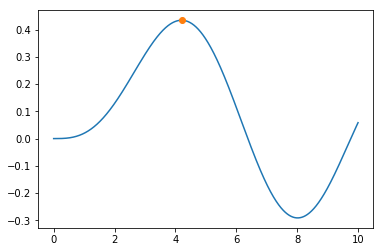

In [25]:
# 以下是一个例子：画出贝塞尔函数的最大值

from scipy import special, optimize
import matplotlib.pyplot as plt
import numpy as np

f = lambda x: -special.jv(3, x)
sol = optimize.minimize(f, 1.0)
x = np.linspace(0, 10, 5000)

plt.plot(x, special.jv(3, x), sol.x, -sol.fun, 'o')
plt.savefig('plot.png', dpi=96)
# plt.savefig('plot.svg', dpi=96)
# plt.savefig('plot.pdf', dpi=96)
plt.show()

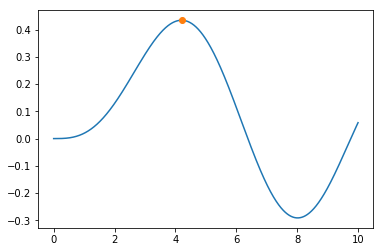

In [26]:
# 写成函数与脚本的形式
from scipy import special, optimize
import matplotlib.pyplot as plt
import numpy as np

def main():
    '''这是主函数'''
    f = lambda x: -special.jv(3, x)
    sol = optimize.minimize(f, 1.0)
    x = np.linspace(0, 10, 5000)

    plt.plot(x, special.jv(3, x), sol.x, -sol.fun, 'o')
    plt.savefig('plot.png', dpi=96)
    # plt.savefig('plot.svg', dpi=96)
    # plt.savefig('plot.pdf', dpi=96)
    plt.show()

    
if __name__ == '__main__':
    main()

## **SciPy Tutorial**

这篇文档更加详细的说明了Scipy库的基本组成以及各个库的用法。

### **1. 介绍**

SciPy是基于Python的NumPy扩展构建的数学算法和便利函数的集合。

通过SciPy，交互式Python会话成为可与MATLAB，IDL，Octave，R-Lab和SciLab等系统相媲美的数据处理和系统原型设计环境。

In [28]:
# 默认的导入方式
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

**SciPy被组织成涵盖不同科学计算领域的子包。 这些总结在下表中：**

|子包名称    |说明                |
|--------   |---                 |
|cluster    |聚类算法             |
|constants  |物理和数学常数       |
|fftpack    |fft相关             |
|integrate  |积分和常微分方程求解器|
|interpolate|插值和平滑样条       |
|io         |输入输出             |
|linalg     |线性代数             |
|ndimage    |N维图像处理          |
|odr        |正交距离回归         |
|optimize   |优化和求根相关       |
|signal     |信号处理             |
|sparse     |稀疏矩阵和相关例程    |
|spatial    |空间数据结构和算法    |
|special    |特殊函数             |
|stats      |统计分布和功能        |

**查看函数的帮助文档由两种方式：**

- 一是使用Python的pydoc模块中的help函数。
- 二是使用Numpy的info函数，即np.info()

**另外一个有用的命令是dir，可以使用它来查看当前包或模块中的空间：**

In [32]:
# import numpy as np
# dir(np)

### **2. 基础函数**

SciPy的顶层也包含了一些来自Numpy的函数。但是你最好还是直接从Numpy模块中调用。

**有一些类实例特别使用切片功能来为数组构造提供有效的方法**。 本部分将讨论numpy.mgrid，numpy.ogrid，numpy.r_和numpy.c_的操作，以便快速构建数组。

In [34]:
a = np.concatenate(([3], [0]*5, np.arange(-1, 1.002, 2/9.0)))
a

array([ 3.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -1.        , -0.77777778, -0.55555556, -0.33333333,
       -0.11111111,  0.11111111,  0.33333333,  0.55555556,  0.77777778,
        1.        ])

In [35]:
a = np.r_[3,[0]*5,-1:1:10j]
a

array([ 3.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -1.        , -0.77777778, -0.55555556, -0.33333333,
       -0.11111111,  0.11111111,  0.33333333,  0.55555556,  0.77777778,
        1.        ])

In [36]:
np.mgrid[0:5,0:5]

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [37]:
np.mgrid[0:5:4j,0:5:4j]

array([[[0.        , 0.        , 0.        , 0.        ],
        [1.66666667, 1.66666667, 1.66666667, 1.66666667],
        [3.33333333, 3.33333333, 3.33333333, 3.33333333],
        [5.        , 5.        , 5.        , 5.        ]],

       [[0.        , 1.66666667, 3.33333333, 5.        ],
        [0.        , 1.66666667, 3.33333333, 5.        ],
        [0.        , 1.66666667, 3.33333333, 5.        ],
        [0.        , 1.66666667, 3.33333333, 5.        ]]])

**在SciPy中有两种（可互换的）方法来处理1-d多项式**。 第一种是使用NumPy中的poly1d类。 该类接受系数或多项式根来初始化多项式。 然后可以在代数表达式中操纵多项式对象，对其进行积分，区分和评估。 它甚至像多项式一样打印：

In [40]:
from numpy import poly1d
p = poly1d([3,4,5])
print(p)
# 注意那个悬空的2指的是 x的平方，这个表示可太秀了

   2
3 x + 4 x + 5


In [41]:
print(p*p)

   4      3      2
9 x + 24 x + 46 x + 40 x + 25


In [42]:
print(p.integ(k=6))

   3     2
1 x + 2 x + 5 x + 6


In [43]:
print(p.deriv())

 
6 x + 4


In [44]:
p([4, 5])

array([ 69, 100])

**处理多项式的另一种方法是作为系数阵列**，其中阵列的第一个元素给出最高功率的系数。 存在显式函数来加，减，乘，除，积分，区分和评估表示为系数序列的多项式。

**NumPy提供的一个功能是类向量化，用于转换普通的Python函数**，该函数接受标量并将标量返回到“向量化函数”，其具有与其他NumPy函数相同的广播规则（即通用函数或ufuncs）。 例如，假设您有一个名为addsubtract的Python函数定义为：

In [46]:
def addsubtract(a,b):
    if a > b:
        return a - b
    else:
        return a + b

In [47]:
vec_addsubtract = np.vectorize(addsubtract)

In [48]:
vec_addsubtract([0,3,6,9],[1,3,5,7])

array([1, 6, 1, 2])

这个特定的函数可以用矢量形式编写而不使用矢量化。 但是，使用优化或集成例程的函数很可能只能使用向量化进行矢量化。

请注意numpy.iscomplex / numpy.isreal和numpy.iscomplexobj / numpy.isrealobj之间的区别。 前一个命令是基于数组的，返回1和0的字节数组，提供元素测试的结果。 后一个命令是基于对象的，并返回一个标量，描述整个对象的测试结果。

**还应该提到其他一些有用的功能：**
- 角度处理：angle, unwrap
- 初始化：linspace, logspace
- 索引：selct

In [49]:
x = np.arange(10)
condlist = [x<3, x>5]
choicelist = [x, x**2]
np.select(condlist, choicelist)

array([ 0,  1,  2,  0,  0,  0, 36, 49, 64, 81])

**其它的一些有用的函数可以从 scipy.special 模块中找到。**

### **3. 子模块介绍**

以下是对各个子模块的介绍，但是考虑到实际中远远不会覆盖到全部的模块，因此只需要重点学习常用的模块即可。

因此我选择对以下三个模块学习，目前还没有发现一些好的翻译，因此有时间可以试着自己简单翻译一下说明文档。

- scipy.fftpack
- scipy.signal
- scipy.linalg